In [7]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as pl
import sys
import pandas as pd
import os
import urllib
from scipy.stats import linregress

In [2]:
pl.rcParams['figure.figsize'] = (16/2.54, 16/2.54)
pl.rcParams['font.size'] = 11
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.top'] = True
pl.rcParams['figure.dpi'] = 96

In [8]:
def check_and_download(filepath, url):
    """Checks prescence of a file and downloads if not present.

    Inputs
    ------
        filepath : str
            filename to download to
        url :
            url to download from
    """
    if not os.path.isfile(filepath):
        urllib.request.urlretrieve(url, filepath)
    return

In [11]:
check_and_download(
    '../data_input/input4mips/solarforcing-ref-mon_input4MIPs_solar_CMIP_SOLARIS-HEPPA-3-2_gn_185001-229912.nc',
    'http://aims3.llnl.gov/thredds/fileServer/user_pub_work/input4MIPs/CMIP6/CMIP/SOLARIS-HEPPA/SOLARIS-HEPPA-3-2/atmos/mon/multiple/gm/v20170103/solarforcing-ref-mon_input4MIPs_solar_CMIP_SOLARIS-HEPPA-3-2_gn_185001-229912.nc'
)

In [12]:
nc_future = Dataset('../data_input/input4mips/solarforcing-ref-mon_input4MIPs_solar_CMIP_SOLARIS-HEPPA-3-2_gn_185001-229912.nc')
tsi_future = nc_future.variables['tsi'][:(251*12)]
nc_future.close()

In [13]:
years = np.arange(1850, 2101, dtype=int)
isleap = np.zeros(251)
isleap[np.logical_and(years%4==0, np.logical_or(years%100!=0, years%400==0))] = 1

In [14]:
tsi = np.zeros(251)
for i, year in enumerate(years):
    weights = [31,28+isleap[i],31,30,31,30,31,31,30,31,30,31]
    tsi[i] = np.average(tsi_future[(i)*12:(1+i)*12], weights=weights)

In [15]:
tsi_baseline = np.mean(tsi[:24])
tsi_baseline

1360.7481368624874

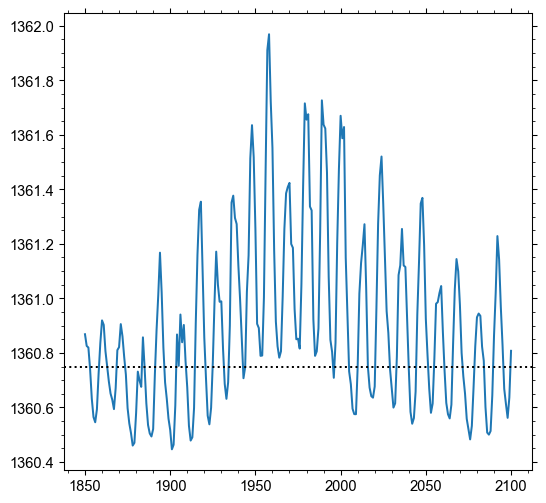

In [16]:
pl.plot(np.arange(1850, 2101), tsi)
pl.axhline(tsi_baseline, ls=':', color='k')

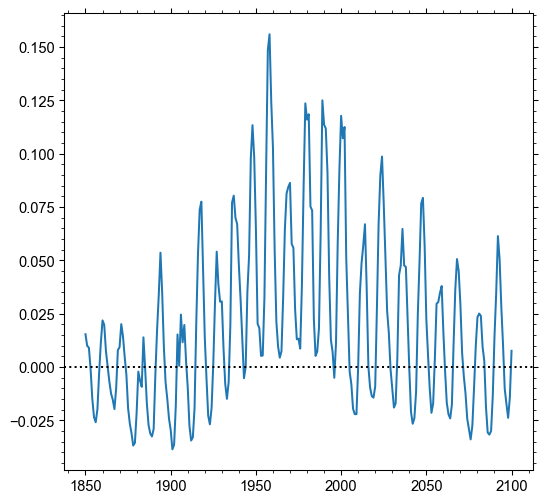

In [17]:
solar_erf = 0.25 * (tsi-tsi_baseline) * 0.71 * 0.72  # include RA
pl.plot(np.arange(1850, 2101), solar_erf)
pl.axhline(0, ls=':', color='k')

In [18]:
# pre-processed RFMIP-histnat runs. Method pretty similar to notebook that does the ERF for aerosols
rfmip_tier2 = pd.read_csv('../data_input/RFMIP-ERF-tier2.csv', index_col=0)
natural = rfmip_tier2[['CanESM5 NAT', 'GFDL-CM4 NAT', 'GISS-E2-1-G NAT', 'HadGEM3-GC31-LL NAT', 'IPSL-CM6A-LR NAT', 'MIROC6 NAT', 'NorESM2-LM NAT']]
natural

,CanESM5 NAT,GFDL-CM4 NAT,GISS-E2-1-G NAT,HadGEM3-GC31-LL NAT,IPSL-CM6A-LR NAT,MIROC6 NAT,NorESM2-LM NAT
year,,,,,,,
1850,0.437284,0.127826,0.109629,0.217894,0.193991,-0.037077,0.351767
1851,0.003158,0.223375,-0.329789,0.280323,0.193944,0.231050,0.195244
1852,-0.202280,0.199512,0.149565,0.137737,-0.098239,0.075457,-0.077189
1853,-0.161843,0.166399,-0.105968,0.189263,0.219294,-0.145791,0.339919
1854,0.061468,0.364801,0.011749,0.158687,0.168342,0.149833,-0.216705
...,...,...,...,...,...,...,...
2096,0.154930,-0.133315,0.181825,0.103691,0.169500,0.163041,NaN
2097,0.008238,-0.067166,-0.009377,0.154095,0.008598,0.014279,NaN
2098,-0.016735,-0.162721,0.127037,0.031064,0.134732,-0.153561,NaN


In [19]:
natural.loc[1850:2015].mean().mean()

0.04968516036821594

In [20]:
np.mean(solar_erf[:165])

0.02506019433529901

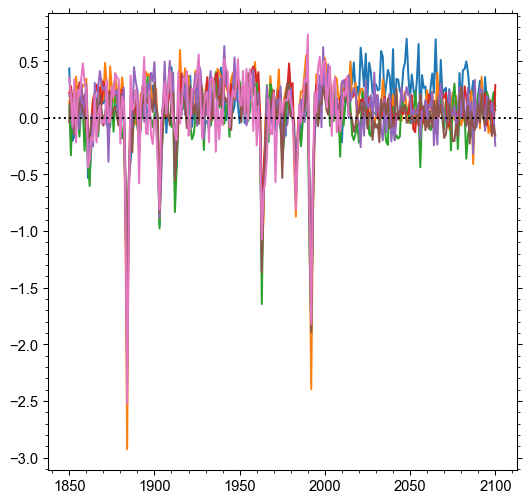

In [21]:
pl.plot(natural)
pl.axhline(0, ls=':', color='k')

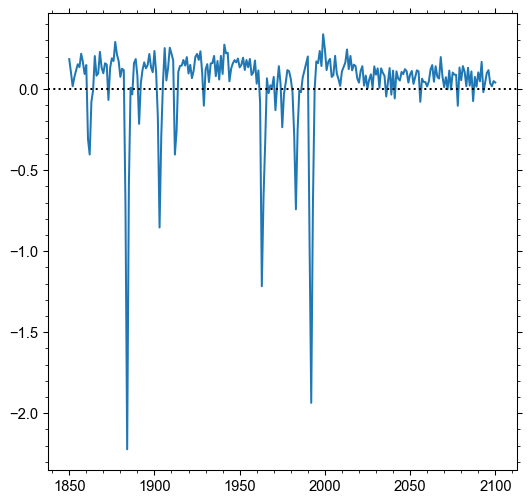

In [22]:
pl.plot(natural.mean(axis=1) - solar_erf)
pl.axhline(0, ls=':', color='k')

In [23]:
volc = natural - solar_erf[:,None]
volc

,CanESM5 NAT,GFDL-CM4 NAT,GISS-E2-1-G NAT,HadGEM3-GC31-LL NAT,IPSL-CM6A-LR NAT,MIROC6 NAT,NorESM2-LM NAT
year,,,,,,,
1850,0.421896,0.112438,0.094241,0.202506,0.178603,-0.052465,0.336379
1851,-0.006758,0.213459,-0.339705,0.270407,0.184028,0.221134,0.185328
1852,-0.211416,0.190376,0.140429,0.128601,-0.107375,0.066321,-0.086325
1853,-0.160867,0.167374,-0.104993,0.190238,0.220270,-0.144815,0.340895
1854,0.076319,0.379652,0.026600,0.173538,0.183193,0.164684,-0.201854
...,...,...,...,...,...,...,...
2096,0.165108,-0.123136,0.192004,0.113870,0.179679,0.173219,NaN
2097,0.025471,-0.049933,0.007856,0.171329,0.025831,0.031512,NaN
2098,0.007055,-0.138932,0.150827,0.054854,0.158522,-0.129772,NaN


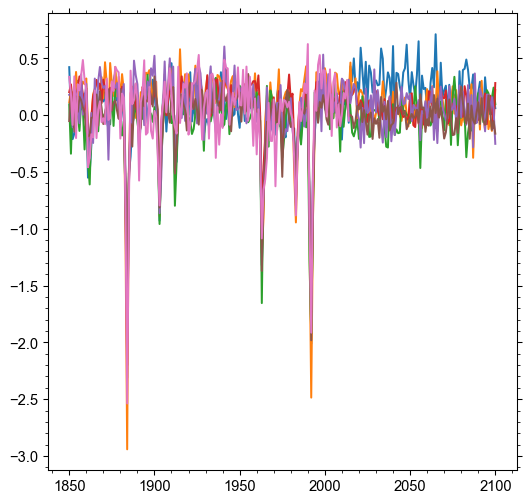

In [24]:
pl.plot(volc)

In [25]:
volc.loc[1992,:]

CanESM5 NAT           -2.012769
GFDL-CM4 NAT          -2.486031
GISS-E2-1-G NAT       -1.918139
HadGEM3-GC31-LL NAT   -1.737457
IPSL-CM6A-LR NAT      -1.503888
MIROC6 NAT            -1.981592
NorESM2-LM NAT        -1.914555
Name: 1992, dtype: float64

In [26]:
# This dataset is processed from the Toohey and Sigl / CMIP6 / GloSSAC data - see supplement for info
# full crunching notebook will be released with AR6 :)
saod = pd.read_csv("../data_input/volcanic_sAOD_monthly_-50001-201912.csv", index_col=0)

In [27]:
saod_annual = np.zeros(165)
for year in range(1850,2015):
    saod_annual[year-1850] = saod.loc[year:year+1,:].mean()
saod_annual = pd.DataFrame(
    {
        'year' : np.arange(1850,2015,dtype=int),
        'sAOD' : saod_annual
    }
)
saod_annual.set_index('year',inplace=True)
saod_annual

,sAOD
year,
1850,0.003189
1851,0.002991
1852,0.003256
1853,0.012348
1854,0.014015
...,...
2010,0.006070
2011,0.008002
2012,0.006223


In [28]:
saod_annual.mean()

sAOD    0.010341
dtype: float64

In [29]:
volc_saod = volc.join(saod_annual-saod_annual.mean())

In [30]:
volc_saod

,CanESM5 NAT,GFDL-CM4 NAT,GISS-E2-1-G NAT,HadGEM3-GC31-LL NAT,IPSL-CM6A-LR NAT,MIROC6 NAT,NorESM2-LM NAT,sAOD
year,,,,,,,,
1850,0.421896,0.112438,0.094241,0.202506,0.178603,-0.052465,0.336379,-0.007152
1851,-0.006758,0.213459,-0.339705,0.270407,0.184028,0.221134,0.185328,-0.007350
1852,-0.211416,0.190376,0.140429,0.128601,-0.107375,0.066321,-0.086325,-0.007085
1853,-0.160867,0.167374,-0.104993,0.190238,0.220270,-0.144815,0.340895,0.002007
1854,0.076319,0.379652,0.026600,0.173538,0.183193,0.164684,-0.201854,0.003673
...,...,...,...,...,...,...,...,...
2096,0.165108,-0.123136,0.192004,0.113870,0.179679,0.173219,NaN,NaN
2097,0.025471,-0.049933,0.007856,0.171329,0.025831,0.031512,NaN,NaN
2098,0.007055,-0.138932,0.150827,0.054854,0.158522,-0.129772,NaN,NaN


In [31]:
sl, ic, _,_,_ = linregress(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'CanESM5 NAT'].values)

In [32]:
sl

-20.62976034104178

-20.62976034104178

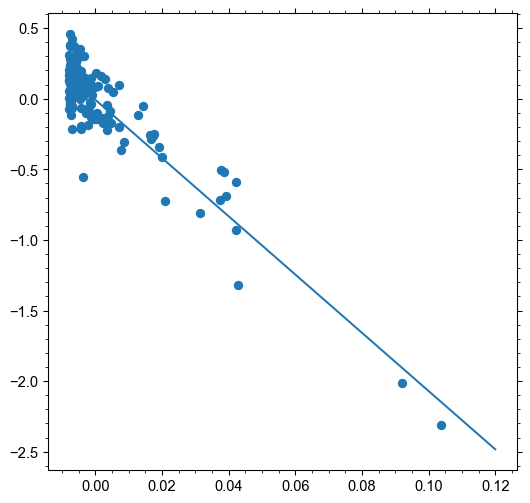

In [33]:
pl.scatter(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'CanESM5 NAT'].values)
sl, ic, _,_,_ = linregress(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'CanESM5 NAT'].values)
pl.plot(np.linspace(0,0.12,100), sl*np.linspace(0,0.12,100)+ic)
sl

-26.459955546874035

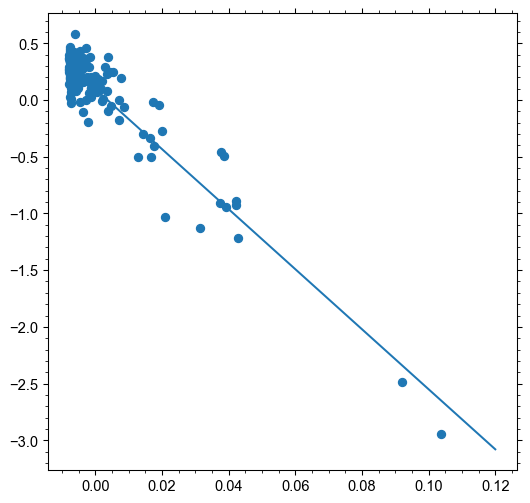

In [34]:
pl.scatter(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'GFDL-CM4 NAT'].values)
sl, ic, _,_,_ = linregress(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'GFDL-CM4 NAT'].values)
pl.plot(np.linspace(0,0.12,100), sl*np.linspace(0,0.12,100)+ic)
sl

-19.422443615935954

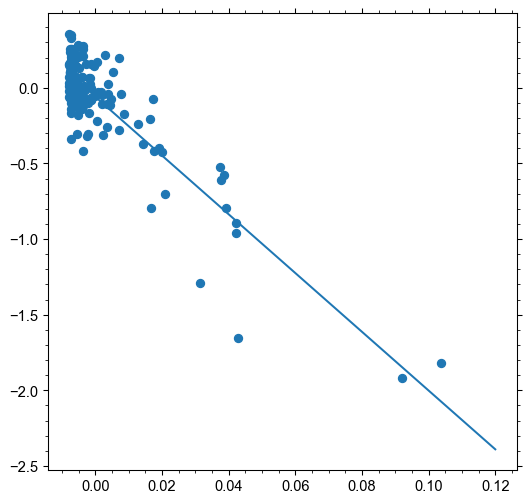

In [35]:
pl.scatter(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'GISS-E2-1-G NAT'].values)
sl, ic, _,_,_ = linregress(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'GISS-E2-1-G NAT'].values)
pl.plot(np.linspace(0,0.12,100), sl*np.linspace(0,0.12,100)+ic)
sl

-19.72218852170384

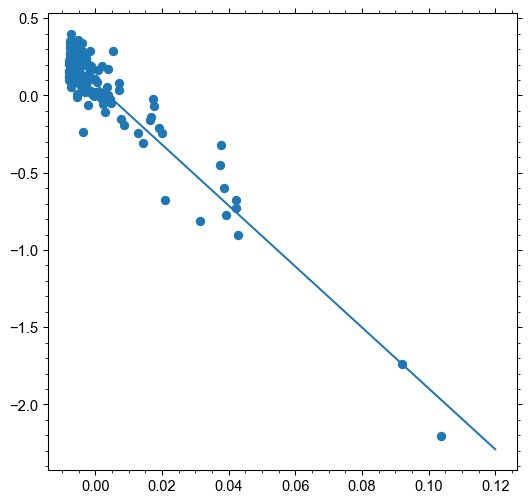

In [36]:
pl.scatter(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'HadGEM3-GC31-LL NAT'].values)
sl, ic, _,_,_ = linregress(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'HadGEM3-GC31-LL NAT'].values)
pl.plot(np.linspace(0,0.12,100), sl*np.linspace(0,0.12,100)+ic)
sl

-19.72218852170384

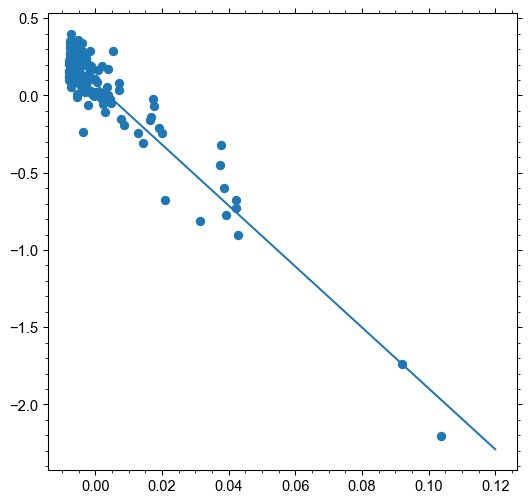

In [37]:
pl.scatter(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'HadGEM3-GC31-LL NAT'].values)
sl, ic, _,_,_ = linregress(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'HadGEM3-GC31-LL NAT'].values)
pl.plot(np.linspace(0,0.12,100), sl*np.linspace(0,0.12,100)+ic)
sl

-18.496596387646537

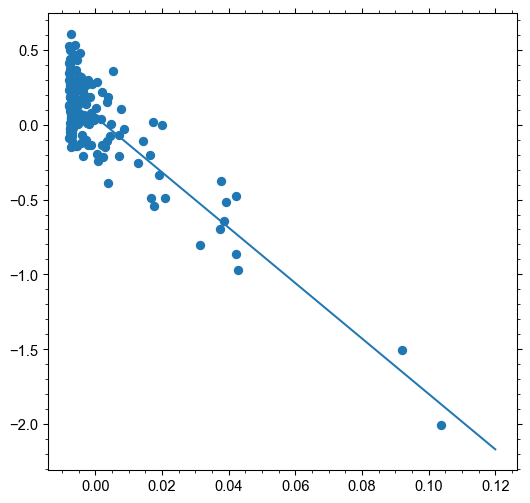

In [38]:
pl.scatter(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'IPSL-CM6A-LR NAT'].values)
sl, ic, _,_,_ = linregress(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'IPSL-CM6A-LR NAT'].values)
pl.plot(np.linspace(0,0.12,100), sl*np.linspace(0,0.12,100)+ic)
sl

-18.24267287289575

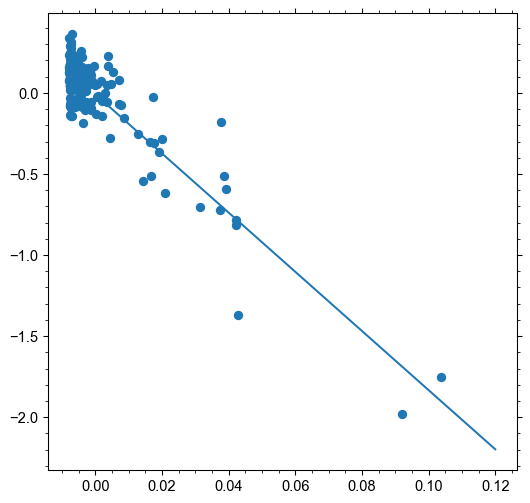

In [39]:
pl.scatter(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'MIROC6 NAT'].values)
sl, ic, _,_,_ = linregress(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'MIROC6 NAT'].values)
pl.plot(np.linspace(0,0.12,100), sl*np.linspace(0,0.12,100)+ic)
sl

-20.976038030665876

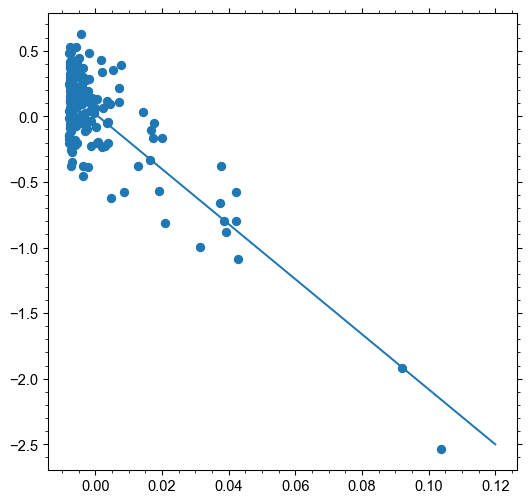

In [40]:
pl.scatter(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'NorESM2-LM NAT'].values)
sl, ic, _,_,_ = linregress(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'NorESM2-LM NAT'].values)
pl.plot(np.linspace(0,0.12,100), sl*np.linspace(0,0.12,100)+ic)
sl

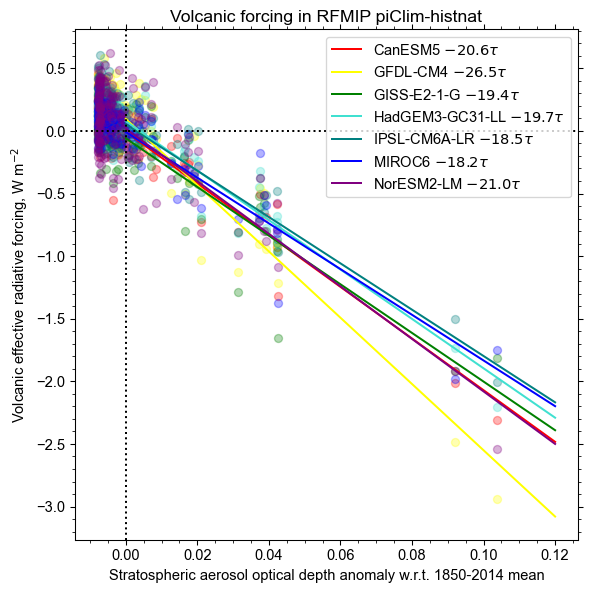

In [41]:
#pl.rcParams['font.size']=16
#fig, ax=pl.subplots(figsize=(9, 9))
fig, ax=pl.subplots(figsize=(16/2.54, 16/2.54))
slope = np.zeros(7)
colors = {
    'CanESM5'        : 'red',#'#1e4c24',
    'E3SM'           : 'darkorange',
    'GFDL-ESM4'      : 'yellowgreen', 
    'GFDL-CM4'       : 'yellow',#'green',
    'GISS-E2-1-G'    : 'green',#'#771d7b',
    'HadGEM3-GC31-LL': 'turquoise',
    'IPSL-CM6A-LR'   : 'teal',
    'MIROC6'         : 'blue',#b85fb7',
    'MRI-ESM2-0'     : 'blueviolet',
    'NorESM2-LM'     : 'purple',#'red',
    'UKESM1-0-LL'    : 'crimson',
}
slope = {}
for model in ['CanESM5', 'GFDL-CM4', 'GISS-E2-1-G', 'HadGEM3-GC31-LL', 'IPSL-CM6A-LR', 'MIROC6', 'NorESM2-LM']:
    ax.scatter(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'%s NAT' % model].values, color=colors[model], alpha=0.3)
    slope[model], ic, _,_,_ = linregress(volc_saod.loc[:2014,'sAOD'].values, volc_saod.loc[:2014,'%s NAT' % model].values)
    ax.plot(np.linspace(0,0.12,100), slope[model]*np.linspace(0,0.12,100)+ic, color=colors[model], label=r'%s $%4.1f \tau$' % (model, slope[model]))
ax.legend()
ax.set_ylabel('Volcanic effective radiative forcing, W m$^{-2}$')
ax.set_xlabel('Stratospheric aerosol optical depth anomaly w.r.t. 1850-2014 mean')
ax.set_title('Volcanic forcing in RFMIP piClim-histnat')
ax.axhline(0, color='k', ls=':')
ax.axvline(0, color='k', ls=':')
pl.tight_layout()
pl.savefig('../figures/figureS8.png', dpi=300)
pl.savefig('../figures/figureS8.pdf')

In [42]:
slope

{'CanESM5': -20.62976034104178,
 'GFDL-CM4': -26.459955546874035,
 'GISS-E2-1-G': -19.422443615935954,
 'HadGEM3-GC31-LL': -19.72218852170384,
 'IPSL-CM6A-LR': -18.496596387646537,
 'MIROC6': -18.24267287289575,
 'NorESM2-LM': -20.976038030665876}

In [43]:
dummy = np.zeros(7)
for i, value in enumerate(slope.values()):
    dummy[i]=value
    
dummy.mean()

-20.564236473823396